In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn import preprocessing
from numpy.linalg import inv

In [ ]:
!gdown 16uFzwzOA31PoWhTSNNe6XdQzprhPIk4h

Downloading...
From: https://drive.google.com/uc?id=16uFzwzOA31PoWhTSNNe6XdQzprhPIk4h
To: /content/4K_House_Rent_Dataset.csv
100% 567k/567k [00:00<00:00, 119MB/s]


In [ ]:
dataframe = pd.read_csv("4K_House_Rent_Dataset.csv")
dataframe


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [ ]:
dataframe.drop(['Posted On','Floor','Area Locality','City','Tenant Preferred','Point of Contact'],axis='columns',inplace=True)
dataframe.head()

,BHK,Rent,Size,Area Type,Furnishing Status,Bathroom
0,2,10000,1100,Super Area,Unfurnished,2
1,2,20000,800,Super Area,Semi-Furnished,1
2,2,17000,1000,Super Area,Semi-Furnished,1
3,2,10000,800,Super Area,Unfurnished,1
4,2,7500,850,Carpet Area,Unfurnished,1


In [ ]:
for column in dataframe:
    print(f'{column} : {dataframe[column].unique()}')

BHK : [2 1 3 6 4 5]
Rent : [  10000   20000   17000    7500    7000    5000   26000   25000    6500
    5500    8500   40000    6000   11000    7900    9000    4000    8000
    5300   12500   15000   22000   21000    7200   12000    4600   30000
    3500   16000   14500    8200    6700   18000   35000  180000   14000
    3900    6300   13000    6800    4700    4500   17500    2200    9500
   16500   10500   50000    5200   24000    3000    3200    1500    3800
    6200    9900   36125   23000    5146   22500   34000    1800    3700
    3300   60000   65000   45000   70000   75000  160000  300000  130000
   33000   32000   49000   28000   33500   85000  270000  400000  150000
  100000   19411  190000   68000  110000   44000   43000   57000   27000
   55000   95000   80000   89000   38000  350000  170000  210000   47000
  120000   62000   42000   41000   84500  220000  310000   53000  250000
   13500   25500   45002   48000  140000  230000  600000   46000   55100
  320000   92500   29999

In [ ]:
dataframe['Area Type'].replace({'Super Area' : 0,'Carpet Area' : 1, 'Built Area': 2},inplace=True)
dataframe['Furnishing Status'].replace({'Unfurnished' : 0,'Semi-Furnished' : 1, 'Furnished': 2},inplace=True)

In [ ]:
# cols = ['BHK','Size','Area Type','Furnishing Status','Bathroom']
# # scaler = preprocessing.MinMaxScaler()
# # dataframe[cols] = scaler.fit_transform(dataframe[cols])
# dataframe.head()

In [ ]:
y = dataframe['Rent']
x = dataframe.drop('Rent',axis='columns')
x.head()

,BHK,Size,Area Type,Furnishing Status,Bathroom
0,2,1100,0,0,2
1,2,800,0,1,1
2,2,1000,0,1,1
3,2,800,0,0,1
4,2,850,1,0,1


In [ ]:
x = np.hstack((np.ones((len(dataframe), 1)), x))
x[:5]

array([[1.0e+00, 2.0e+00, 1.1e+03, 0.0e+00, 0.0e+00, 2.0e+00],
       [1.0e+00, 2.0e+00, 8.0e+02, 0.0e+00, 1.0e+00, 1.0e+00],
       [1.0e+00, 2.0e+00, 1.0e+03, 0.0e+00, 1.0e+00, 1.0e+00],
       [1.0e+00, 2.0e+00, 8.0e+02, 0.0e+00, 0.0e+00, 1.0e+00],
       [1.0e+00, 2.0e+00, 8.5e+02, 1.0e+00, 0.0e+00, 1.0e+00]])

# Normal Equation

In [ ]:
def calculateTheta():
  XTX = np.matmul(x.T, x)
  XTY = np.matmul(x.T,y)
  inverse_XTX = inv(XTX)
  theta = np.matmul(inverse_XTX, XTY)
  return theta

In [ ]:
theta = calculateTheta()
print("Theta", theta)

Theta [-4.78723430e+04 -2.30749254e+03  2.62171622e+01  2.33881778e+04
  6.42681663e+03  2.34376966e+04]


In [ ]:
def predict(X_test):
  # x = []
  # x.append(X_test[0])
  # x = x + list(scaler.transform([X_test[1:6]])[0])
  x = X_test
  return np.sum(np.multiply(x, theta))
print("Prediction ", predict([1, 3, 1800, 0, 1, 1]))

Prediction  22260.5845612407


In [ ]:
def compute_cost(x, y, theta):
    predictions = x.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * len(dataframe)) * np.sum(sqrErrors)
    return J

In [ ]:
cost = compute_cost(x, y, theta)  
cost

2328402243.3940825

## Plotting


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot(x, y, label_x, label_y, theta, theta0):
  lin_x = np.linspace(np.min(x), np.max(x), 10)
  reg_line = theta * lin_x + theta0
  plt.plot(lin_x, reg_line, c='r', label='Regression Line')
  plt.scatter(x, y, label = 'Scatter Plot')
  plt.xlabel(label_x)
  plt.ylabel(label_y)
  plt.legend()
  plt.show()

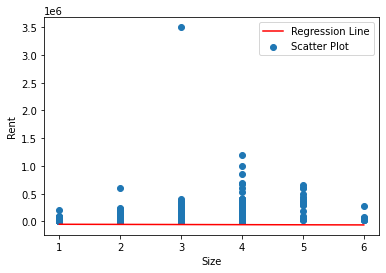

In [ ]:
plot(dataframe['BHK'], y, "Size", "Rent", theta[1], theta[0])

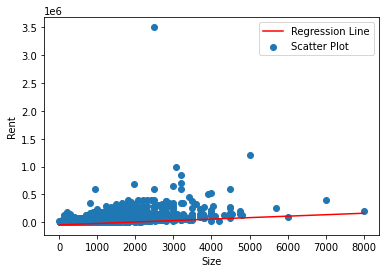

In [ ]:
plot(dataframe['Size'], y, "Size", "Rent", theta[2], theta[0])

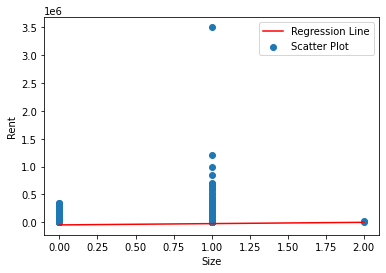

In [ ]:
plot(dataframe['Area Type'], y, "Size", "Rent", theta[3], theta[0])

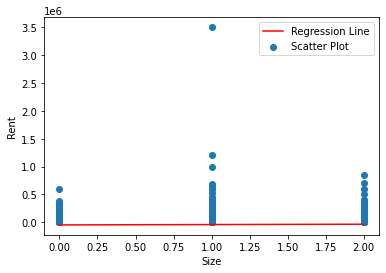

In [ ]:
plot(dataframe['Furnishing Status'], y, "Size", "Rent", theta[4], theta[0])

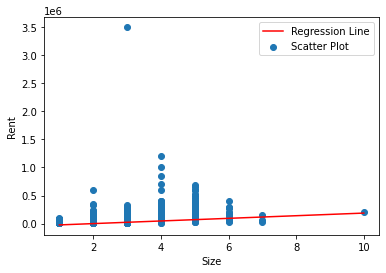

In [ ]:
plot(dataframe['Bathroom'], y, "Size", "Rent", theta[5], theta[0])